<a href="https://colab.research.google.com/github/Kgs-Mathaba/Bank-Marketing/blob/main/TimeSeries1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
#import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error
import io 
#print(os.listdir("../input"))

In [ ]:
pip install chart-studio

     |████████████████████████████████| 71kB 2.1MB/s 


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving all_stocks_2017-01-01_to_2018-01-01.csv to all_stocks_2017-01-01_to_2018-01-01.csv
Saving all_stocks_2006-01-01_to_2018-01-01.csv to all_stocks_2006-01-01_to_2018-01-01.csv
Saving AMZN_2006-01-01_to_2018-01-01.csv to AMZN_2006-01-01_to_2018-01-01.csv
Saving AXP_2006-01-01_to_2018-01-01.csv to AXP_2006-01-01_to_2018-01-01.csv
Saving BA_2006-01-01_to_2018-01-01.csv to BA_2006-01-01_to_2018-01-01.csv
Saving CAT_2006-01-01_to_2018-01-01.csv to CAT_2006-01-01_to_2018-01-01.csv
Saving CSCO_2006-01-01_to_2018-01-01.csv to CSCO_2006-01-01_to_2018-01-01.csv
Saving CVX_2006-01-01_to_2018-01-01.csv to CVX_2006-01-01_to_2018-01-01.csv
Saving DIS_2006-01-01_to_2018-01-01.csv to DIS_2006-01-01_to_2018-01-01.csv
Saving GE_2006-01-01_to_2018-01-01.csv to GE_2006-01-01_to_2018-01-01.csv
Saving GOOGL_2006-01-01_to_2018-01-01.csv to GOOGL_2006-01-01_to_2018-01-01.csv
Saving GS_2006-01-01_to_2018-01-01.csv to GS_2006-01-01_to_2018-01-01.csv
Saving HD_2006-01-01_to_2018-01-01.csv to HD_2006-01-01_to

In [ ]:
google = pd.read_csv(io.BytesIO(uploaded['GOOGL_2006-01-01_to_2018-01-01.csv']), index_col='Date', parse_dates=['Date']) 
print(google)

               Open     High      Low    Close    Volume   Name
Date                                                           
2006-01-03   211.47   218.05   209.32   217.83  13137450  GOOGL
2006-01-04   222.17   224.70   220.09   222.84  15292353  GOOGL
2006-01-05   223.22   226.00   220.97   225.85  10815661  GOOGL
2006-01-06   228.66   235.49   226.85   233.06  17759521  GOOGL
2006-01-09   233.44   236.94   230.70   233.68  12795837  GOOGL
...             ...      ...      ...      ...       ...    ...
2017-12-22  1070.00  1071.72  1067.64  1068.86    889446  GOOGL
2017-12-26  1068.64  1068.86  1058.64  1065.85    918767  GOOGL
2017-12-27  1066.60  1068.27  1058.38  1060.20   1116203  GOOGL
2017-12-28  1062.25  1064.84  1053.38  1055.95    994249  GOOGL
2017-12-29  1055.49  1058.05  1052.70  1053.40   1180340  GOOGL

[3019 rows x 6 columns]


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving humidity.csv to humidity.csv


In [ ]:
humidity = pd.read_csv(io.BytesIO(uploaded['humidity.csv']), index_col='datetime', parse_dates=['datetime']) 
humidity.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,93.0,87.0,93.0,71.0,67.0,71.0,71.0,100.0,76.0,94.0,76.0,88.0,87.0,83.0,93.0,82.0,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,92.0,70.0,66.0,71.0,70.0,99.0,76.0,94.0,75.0,87.0,87.0,82.0,93.0,81.0,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,90.0,70.0,66.0,71.0,70.0,99.0,76.0,94.0,75.0,87.0,87.0,82.0,93.0,79.0,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,89.0,70.0,65.0,71.0,70.0,99.0,76.0,94.0,74.0,87.0,87.0,82.0,93.0,77.0,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0


In [ ]:
#remove first row and forward fill null values
humidity = humidity.iloc[1:]
humidity = humidity.fillna(method='ffill')
humidity.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,93.0,87.0,93.0,71.0,67.0,71.0,71.0,100.0,76.0,94.0,76.0,88.0,87.0,83.0,93.0,82.0,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,92.0,70.0,66.0,71.0,70.0,99.0,76.0,94.0,75.0,87.0,87.0,82.0,93.0,81.0,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,90.0,70.0,66.0,71.0,70.0,99.0,76.0,94.0,75.0,87.0,87.0,82.0,93.0,79.0,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,89.0,70.0,65.0,71.0,70.0,99.0,76.0,94.0,74.0,87.0,87.0,82.0,93.0,77.0,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 17:00:00,78.0,79.0,84.0,79.0,88.0,80.0,21.0,24.0,49.0,63.0,92.0,86.0,88.0,69.0,65.0,71.0,69.0,99.0,76.0,94.0,74.0,86.0,87.0,81.0,93.0,76.0,69.0,57.0,80.0,68.0,54.0,62.0,23.0,51.0,51.0,50.0


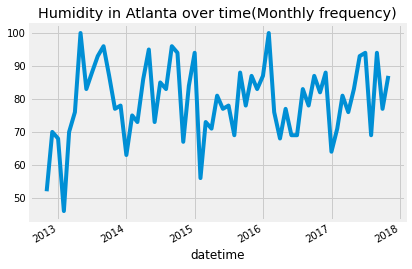

In [ ]:
humidity["Atlanta"].asfreq('M').plot() # asfreq method is used to convert a time series to a specified frequency. Here it is monthly frequency.
plt.title('Humidity in Atlanta over time(Monthly frequency)')
plt.show()